<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-3-Assignments/blob/main/Ivan_Mihailov_DSPT11_232_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion and initial EDA

In [1]:
import pandas as pd
import numpy as np

**Type of Problem:** Classification of Drought Conditions in U.S. Counties based on meteorological and soil data

In [2]:
# Ingest meteorological data from training dataset as dataframe
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/train_timeseries/train_timeseries.csv')
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [3]:
train.shape

(19300680, 21)

In [4]:
# Determine whether there are NaNs in the data and their significance (if any)
train.isna().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [5]:
train.describe() # Explore the training dataset

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [6]:
train.head(20)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN
5,1001,2000-01-06,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,15.85,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,NaN
6,1001,2000-01-07,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,13.88,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,NaN
7,1001,2000-01-08,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,13.04,8.75,2.05,2.91,1.50,1.40,4.17,5.73,2.01,3.72,NaN
8,1001,2000-01-09,16.19,99.88,11.18,15.73,15.45,15.45,19.60,10.30,9.31,15.65,3.03,3.98,2.25,1.73,5.97,7.44,4.95,2.49,NaN
9,1001,2000-01-10,21.23,99.78,7.77,13.61,9.59,9.60,17.65,7.73,9.92,13.42,3.10,5.60,1.72,3.88,6.33,10.03,4.15,5.88,NaN


In [7]:
train.tail(30)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
19300650,56043,2016-12-02,0.38,83.28,2.34,-4.79,-8.58,-8.50,-1.32,-8.54,7.22,-5.47,2.13,3.50,1.21,2.28,3.33,6.55,1.28,5.27,NaN
19300651,56043,2016-12-03,0.13,82.88,1.95,-3.99,-10.63,-10.47,2.96,-9.31,12.27,-4.66,4.69,8.30,3.23,5.06,7.34,10.49,5.67,4.82,NaN
19300652,56043,2016-12-04,0.49,82.25,2.73,-1.52,-6.98,-6.91,3.31,-6.38,9.69,-2.53,5.50,6.99,3.22,3.77,8.51,11.28,5.74,5.54,NaN
19300653,56043,2016-12-05,1.83,82.25,1.88,-6.47,-12.14,-11.81,0.29,-13.75,14.04,-7.00,5.65,9.52,2.64,6.88,7.83,11.63,4.49,7.14,NaN
19300654,56043,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0
19300655,56043,2016-12-07,0.27,83.50,0.82,-14.59,-19.45,-18.82,-11.73,-17.08,5.35,-14.34,1.93,3.55,0.15,3.40,2.25,3.89,0.21,3.68,NaN
19300656,56043,2016-12-08,0.06,83.56,0.93,-13.58,-18.39,-17.91,-7.40,-19.04,11.64,-13.83,2.94,4.07,1.48,2.58,3.83,5.15,2.10,3.05,NaN
19300657,56043,2016-12-09,0.98,82.99,2.36,-6.32,-8.90,-8.83,-1.50,-12.08,10.58,-6.77,1.95,3.30,0.53,2.77,3.04,5.60,0.79,4.80,NaN
19300658,56043,2016-12-10,0.86,82.13,3.90,0.06,-2.40,-2.39,4.19,-3.14,7.34,-1.18,4.35,5.19,3.33,1.87,7.42,9.59,5.76,3.83,NaN
19300659,56043,2016-12-11,0.24,82.49,2.09,-3.65,-10.00,-9.83,1.19,-7.00,8.19,-4.80,3.79,6.73,1.32,5.41,6.05,9.11,2.12,6.99,NaN


In [8]:
train['score'].value_counts() # Determine the type of values in the 'score' column

0.0000    1480827
1.0000     219135
2.0000     123789
3.0000      82801
4.0000      45841
           ...   
1.0601          1
0.8077          1
1.0362          1
2.7554          1
4.6692          1
Name: score, Length: 55294, dtype: int64

# **This Dataset is too large as presented**


*   It frequently crashes Google Colab when more computer-intensive tasks are performed;
*   The data itself is messy (daily meteorogical observations but only weekly measurements of drought)

**Conclusion:** Subset and only use one state (Pennsylvania) for Portfolio Project



In [92]:
# Define wrangling function for training, validation, and test datasets
def wrangle(df):
  
  # Isolate PA counties in the training dataset
  condition = ((df['fips'] == 42001) | (df['fips'] == 42003) | 
             (df['fips'] == 42005) | (df['fips'] == 42007) | 
             (df['fips'] == 42009) | (df['fips'] == 42011) | 
             (df['fips'] == 42013) | (df['fips'] == 42015) | 
             (df['fips'] == 42017) | (df['fips'] == 42019) | 
             (df['fips'] == 42021) | (df['fips'] == 42023) | 
             (df['fips'] == 42025) | (df['fips'] == 42027) |
             (df['fips'] == 42029)	| (df['fips'] == 42031) |
             (df['fips'] == 42033)	| (df['fips'] == 42035) |	
             (df['fips'] == 42037)	| (df['fips'] == 42039) |
             (df['fips'] == 42041)	| (df['fips'] == 42043) |
             (df['fips'] == 42045)	| (df['fips'] == 42047) |
             (df['fips'] == 42049) | (df['fips'] == 42051) |
             (df['fips'] == 42053) | (df['fips'] == 42055) |
             (df['fips'] == 42057) | (df['fips'] == 42059) |
             (df['fips'] == 42061) |	(df['fips'] == 42063) |	
             (df['fips'] == 42065) |	(df['fips'] == 42067) |
             (df['fips'] == 42069)	| (df['fips'] == 42071) |	
             (df['fips'] == 42073) |	(df['fips'] == 42075) |
             (df['fips'] == 42077) |	(df['fips'] == 42079) |
             (df['fips'] == 42081) |	(df['fips'] == 42083) |
             (df['fips'] == 42085) |	(df['fips'] == 42087) | 
             (df['fips'] == 42089) | (df['fips'] == 42091) |
             (df['fips'] == 42093)	| (df['fips'] == 42095) |
             (df['fips'] == 42097)	| (df['fips'] == 42099) |	
             (df['fips'] == 42101)	| (df['fips'] == 42103) |
             (df['fips'] == 42105)	| (df['fips'] == 42107) |
             (df['fips'] == 42109)	| (df['fips'] == 42111) |
             (df['fips'] == 42113)	| (df['fips'] == 42115) | 
             (df['fips'] == 42117) | (df['fips'] == 42119) |
             (df['fips'] == 42121) | (df['fips'] == 42123) |
             (df['fips'] == 42125)	| (df['fips'] == 42127) |
             (df['fips'] == 42129)	| (df['fips'] == 42131) |
             (df['fips'] == 42133))
  
  df = df[condition]
   
  return df

In [93]:
train_pa = wrangle(train)

In [94]:
train_pa.shape

(416070, 21)

In [95]:
# Ingest soil data as dataframe
soil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/soil_data.csv')
soil.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,0.0000,0.0,0.1415,0.2379,0.2183,0.1997,0.2026,0.0000,0.000000,0.4146,2.225602,22.952839,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,0.0000,0.0,0.1168,0.1386,0.1048,0.1282,0.5116,0.0000,0.000000,3.5010,4.972456,28.685991,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,0.0000,0.0,0.1971,0.1885,0.2279,0.2104,0.1761,0.0000,0.000000,0.2283,8.674664,89.172112,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,0.0189,0.0,0.2569,0.1503,0.2028,0.2978,0.0922,0.0000,0.000000,1.0037,8.606856,88.470047,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [96]:
soil.shape

(3109, 32)

In [14]:
soil.isnull().sum() # No null values!

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64

In [97]:
soil_pa = wrangle(soil)

In [98]:
soil_pa.drop(labels = ['lat', 'lon'], axis = 1, inplace = True) # Drop latitude and longtitude from Soil dataframe as likely useless features

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
train_pa_final = pd.merge(left=train_pa, right=soil_pa, how='left', on='fips') # Merge PA weather data with PA soil data

In [101]:
# Set date to DateTime format and use it as index

train_pa_final['date']= pd.to_datetime(train_pa_final['date'])
train_pa_final = train_pa_final.set_index('date')

In [102]:
train_pa_final.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,42001,0.00,99.76,4.06,1.22,0.73,0.73,7.14,-2.04,9.18,0.61,2.14,3.25,0.99,2.26,3.78,6.96,1.43,5.53,NaN,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-02,42001,0.18,99.41,5.71,5.02,5.27,5.27,9.35,1.20,8.16,4.56,3.42,4.50,2.52,1.98,6.15,9.00,3.75,5.25,NaN,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-03,42001,0.37,99.20,7.49,9.46,9.44,9.44,13.50,6.32,7.18,8.88,3.11,4.93,1.89,3.05,5.95,8.87,2.24,6.63,NaN,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-04,42001,8.25,98.29,7.68,10.13,9.17,9.18,14.81,1.72,13.09,9.54,5.51,7.29,4.55,2.74,8.98,11.08,7.45,3.63,0.0,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-05,42001,0.34,99.78,2.67,-0.32,-4.76,-4.69,3.43,-3.22,6.64,-0.86,4.52,7.04,1.16,5.88,7.08,9.72,1.78,7.94,NaN,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1


In [103]:
train_pa_final.shape

(416070, 49)

**Target Column:** 'score' because that is where the drought condition is recorded

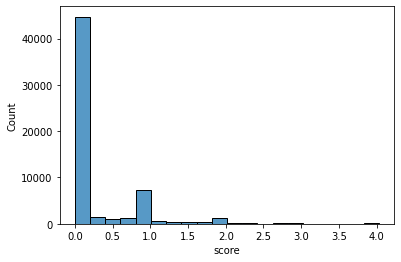

In [20]:
import seaborn as sns

sns.histplot(train_pa_final['score'], bins=20)

Upon further review, this could be treated as a regression or a classification problem. I plan on treating it as a classification problem with the following categories:

*   'None' (score == 0.0)
*   'Abnormal (D0)' (0.0 < score <= 1.0)
*   'Moderate (D1)' (1.0 < score <= 2.0)
*   'Severe (D2)' (2.0 < score <= 3.0)
*   'Extreme (D3)' (3.0 < score <= 4.0)
*   'Exceptional (D4)' (4.0 < score <= 5.0)

Before updating the classification values, the NaNs in the 'score' columns will need to be imputed. This is due to the fact that the meteorogical data is recorded every day but the drought data is recorded every week.



**Evaluation metric:**
Because the majority class frequency is much lower than 50%, accuracy will not be a good evaluation metric as it could be misleading. 
I plan to rely on ROCAUC as the evaluation metric and, in addition, plan to plot the confusion matrix and calculate the precision/recall for the different drought categories.

**Train/Validate/Test**

The split is time-based and was created by the Kaggle dataset author. The split is as follows:

Train: Jan. 1, 2000 to Dec. 31, 2016
Val: Jan. 1, 2017 to Dec. 31, 2018
Test: Jan. 1, 2019 to Dec. 31, 2020

In [135]:
val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/validation_timeseries/validation_timeseries.csv')
val.shape

(2268840, 21)

In [136]:
val_pa = wrangle(val) # Apply wrangle function to isolate Pennsylvania observations in the validation dataset

In [137]:
val_pa_final = pd.merge(left=val_pa, right=soil_pa, how='left', on='fips') # Merge with Soil_PA dataset

In [138]:
# Set date to DateTime format and use it as index

val_pa_final['date']= pd.to_datetime(val_pa_final['date'])
val_pa_final = val_pa_final.set_index('date')

In [139]:
val_pa_final.shape

(48910, 49)

In [53]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/test_timeseries/test_timeseries.csv')
test.shape

(2271948, 21)

In [54]:
test_pa = wrangle(test) # Apply wrangle function to isolate Pennsylvania observations in the test dataset

In [55]:
test_pa_final = pd.merge(left=test_pa, right=soil_pa, how='left', on='fips') # Merge with Soil_PA dataset

In [106]:
# Set date to DateTime format and use it as index

test_pa_final['date']= pd.to_datetime(test_pa_final['date'])
test_pa_final = test_pa_final.set_index('date')

In [107]:
test_pa_final.shape

(48977, 49)

In [141]:
# Define function to fill the NaNs in the target vector using the interpolate method (with default options for linear interpolation)

def target_interpolate(y):
  y = y.interpolate(inplace = True)

  return y

In [140]:
target = 'score'
y_train = train_pa_final[target] # Create target vector for training dataset
y_val = val_pa_final[target] # Create target vector for validation dataset
y_test = test_pa_final[target] # Create target vector for test dataset

In [60]:
target_interpolate(y_train) # Apply target_interpolate function to training dataset

In [142]:
target_interpolate(y_val) # Apply target_interpolate function to validation dataset
#target_interpolate(y_test) # Apply target_interpolate function to test dataset

In [36]:
pd.set_option("display.max_rows", 500000)

In [68]:
# Manually replace first 3 NaN values in y_train (because those values were not interpolated by target_interpolate function)
for i in range(0, 3):
  y_train[i] = y_train[3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
# Manually replace first 2 NaN values in y_val (because those values were not interpolated by target_interpolate function)
for i in range(0, 2):
  y_val[i] = y_val[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
X_train = train_pa_final.drop(columns = target) # Create feature matrix for training dataset
X_val = val_pa_final.drop(columns = target) # Create feature matrix for validation dataset
X_test = test_pa_final.drop(columns = target) # Create feature matrix for training dataset

# Set up problem as a Regression problem using Random Forest Regressor

In [109]:
# Calculate Baseline Score

from sklearn.metrics import accuracy_score, r2_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = r2_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: -0.2464039003325238


In [113]:
# Set up Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, max_depth = 10, random_state = 42)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.1875559885378114
Validation score is: -0.015604862604430279


# Set up problem as a Classification problem using Random Forest Classifier

In [133]:
# Function to change target vector float values to drought categories

def drought_cat(y):
  none = (y == 0.0)
  abnormal = (y > 0.0) & (y <= 1.0)
  moderate = (y > 1.0) & (y <= 2.0)
  severe = (y > 2.0) & (y <= 3.0)
  extreme = (y > 3.0) & (y <= 4.0)
  exceptional = (y > 4.0) & (y <= 5.0)

  y.loc[none] = 'none'
  y.loc[abnormal] = 'abnormal'
  y.loc[moderate] = 'moderate'
  y.loc[severe] = 'severe'
  y.loc[extreme] = 'extreme'
  y.loc[exceptional] = 'exceptional'

  return y

In [ ]:
drought_cat(y_train)

In [ ]:
drought_cat(y_val)

In [146]:
# Calculate Baseline Score

from sklearn.metrics import accuracy_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = accuracy_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.6791885980724397


In [150]:
# Set up Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1, max_depth = 20, random_state = 42)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.8401951594683587
Validation score is: 0.7660601104068697


In [151]:
# Set up Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1, max_depth = 15, random_state = 42)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.7356935131107746
Validation score is: 0.7715191167450419


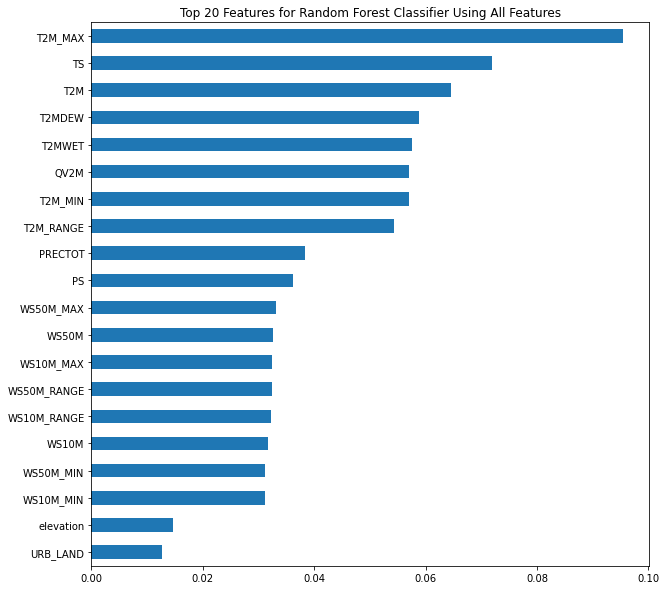

In [152]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, X_train.columns)

n =20
plt.figure(figsize = (10, n/2))
plt.title(f'Top {n} Features for Random Forest Classifier Using All Features')
importances.sort_values()[-n:].plot.barh()

In [ ]:
drought_cat(y_test)

In [155]:
print('Test score is:', model.score(X_test, y_test))

Test score is: 0.7443085529942626
